**PROBLEM STATEMENT** 

adsfasdfdsafdasfdasfdasf

**Imports**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**EDA**

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(2051, 81)

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [7]:
#Start addressing the null values

In [8]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [9]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [10]:
train['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [11]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [12]:
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [13]:
#There are too many missing values from these columns for them to be of use in our model, dropping them

In [14]:
train.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],inplace = True)

In [15]:
train.shape

(2051, 76)

In [16]:
#Most of the missing values are in the garage features, want to determine if there's much value in these

In [17]:
garage = train[['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond','SalePrice']].copy()

In [18]:
garage.shape

(2051, 8)

In [19]:
garage.dtypes

Garage Type       object
Garage Yr Blt    float64
Garage Finish     object
Garage Cars      float64
Garage Area      float64
Garage Qual       object
Garage Cond       object
SalePrice          int64
dtype: object

In [20]:
garage.dropna(inplace = True)

In [21]:
garage.shape

(1937, 8)

In [22]:
new_garage = pd.get_dummies(garage,columns=['Garage Type','Garage Finish','Garage Qual','Garage Cond'])

In [23]:
new_garage.shape

(1937, 23)

In [24]:
new_garage.head()

,Garage Yr Blt,Garage Cars,Garage Area,SalePrice,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,...,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA
0,1976.0,2.0,475.0,130500,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1997.0,2.0,559.0,220000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1953.0,1.0,246.0,109000,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,2007.0,2.0,400.0,174000,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1957.0,2.0,484.0,138500,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


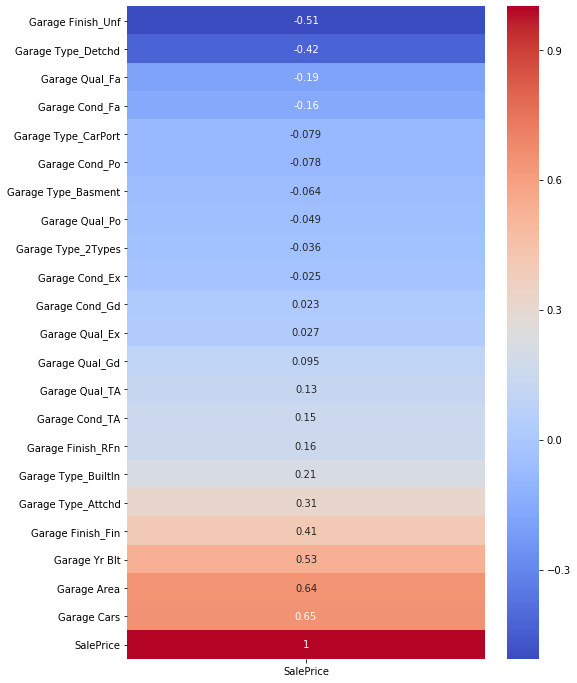

In [25]:
plt.figure(figsize = (8,12))
sns.heatmap(new_garage.corr()[['SalePrice']].sort_values(by='SalePrice'),cmap='coolwarm',annot=True)

In [26]:
garage['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [27]:
#garage finish seems potentially promising, what if i combine those columns into one column of 
#refinished/finished = 1, unfinished =0

In [28]:
garage['finish'] = garage['Garage Finish'].map(lambda x: 1 if (x == 'Fin')|(x == 'RFn') else 0)

In [29]:
garage[['finish','Garage Finish']].head()

,finish,Garage Finish
0,1,RFn
1,1,RFn
2,0,Unf
3,1,Fin
4,0,Unf


In [30]:
new_garage_2 = garage[['finish','Garage Area','Garage Cars','SalePrice']]

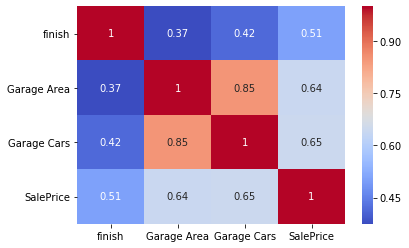

In [31]:
sns.heatmap(new_garage_2.corr(),cmap='coolwarm',annot=True)

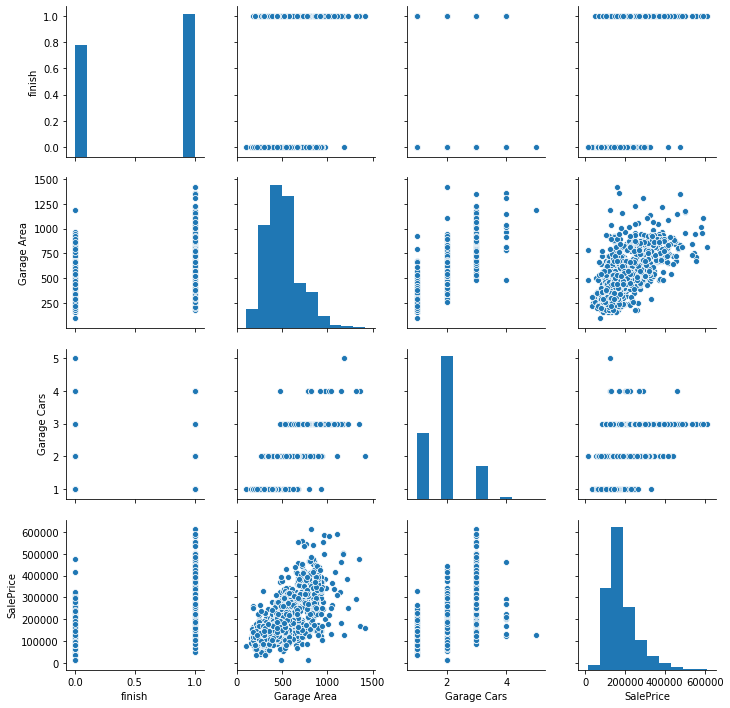

In [32]:
sns.pairplot(new_garage_2)

overall conclusion from garage related data is garage area and cars are tightly correlated together so I should only use one column for my model. Let's go with garage area since that's a continuous number where as garage cars is discrete. I'm not going to use my finish column since the correlation with sale price isn't as high

conviniently, there's only one colum with no garage area so let's drop that row and all columns involving garages except garage area

In [33]:
train.drop(columns=['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond'],inplace = True)

In [34]:
train.shape

(2051, 70)

In [35]:
train.dropna(subset=['Garage Area'],inplace=True)

In [36]:
train.shape

(2050, 70)

In [37]:
train.isnull().sum().sort_values(ascending = True)

Id                   0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
Heating              0
TotRms AbvGrd        0
Fireplaces           0
Garage Area          0
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Functional           0
Sale Type            0
SalePrice            0
                  ... 
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Lot Config           0
Utilities            0
Exter Qual           0
Land Contour         0
Lot Shape            0
Street               0
Lot Area             0
Exter Cond           0
MS Zoning            0
MS SubClass

In [38]:
#let's evaluate the basement criteria similar to how the garage criteria was evaluated

In [39]:
basement = train[['BsmtFin SF 1','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','Bsmt Full Bath','Bsmt Half Bath',\
    'Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure','SalePrice']].copy()

In [40]:
basement.shape

(2050, 12)

In [41]:
basement.dropna().shape

(1991, 12)

In [42]:
basement.dtypes

BsmtFin SF 1      float64
Total Bsmt SF     float64
Bsmt Unf SF       float64
BsmtFin SF 2      float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Bsmt Qual          object
Bsmt Cond          object
BsmtFin Type 1     object
BsmtFin Type 2     object
Bsmt Exposure      object
SalePrice           int64
dtype: object

In [43]:
basement.head()

,BsmtFin SF 1,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure,SalePrice
0,533.0,725.0,192.0,0.0,0.0,0.0,TA,TA,GLQ,Unf,No,130500
1,637.0,913.0,276.0,0.0,1.0,0.0,Gd,TA,GLQ,Unf,No,220000
2,731.0,1057.0,326.0,0.0,1.0,0.0,TA,TA,GLQ,Unf,No,109000
3,0.0,384.0,384.0,0.0,0.0,0.0,Gd,TA,Unf,Unf,No,174000
4,0.0,676.0,676.0,0.0,0.0,0.0,Fa,Gd,Unf,Unf,No,138500


In [44]:
#convert string data to numerical data if possible

Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [45]:
basement['Bsmt Qual'] = basement['Bsmt Qual'].map({'Ex':10,'Gd':9,'TA':8,'Fa':7,'Po':6,'NA':0})

Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [46]:
basement['Bsmt Cond'] = basement['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [47]:
basement['Bsmt Exposure'] = basement['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

BsmtFin Type 1 & 2	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Let's do a scatter to see if this data is usable

In [48]:
basement['BsmtFin Type 1 mod'] = basement['BsmtFin Type 1'].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1})
basement['BsmtFin Type 2 mod'] = basement['BsmtFin Type 2'].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1})

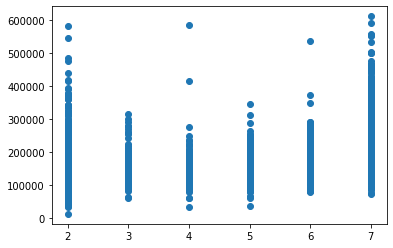

In [49]:
plt.scatter(basement['BsmtFin Type 1 mod'],basement['SalePrice'])

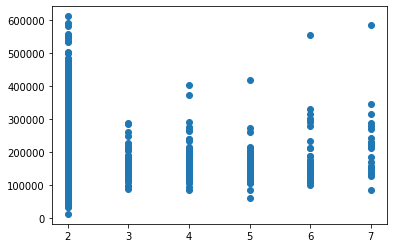

In [50]:
plt.scatter(basement['BsmtFin Type 2 mod'],basement['SalePrice'])

Conclusion is that type 2 looks unusable, type 1 could be minorly useful but given we'd have to eliminate 50 rows to address nulls for it, I'd say it's not that useful and remove them

In [51]:
basement.drop(['BsmtFin Type 1','BsmtFin Type 2','BsmtFin Type 1 mod','BsmtFin Type 2 mod'],axis=1,inplace=True)

combine basement bathroom columns

In [52]:
basement['Bsmt Bath'] = basement['Bsmt Full Bath']+(.5*basement['Bsmt Half Bath'])

In [53]:
#verify that the above worked
basement[basement['Bsmt Bath']>1].head()

,BsmtFin SF 1,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Cond,Bsmt Exposure,SalePrice,Bsmt Bath
133,1619.0,1719.0,100.0,0.0,2.0,0.0,9.0,3.0,4.0,324000,2.0
191,51.0,966.0,0.0,915.0,2.0,0.0,9.0,4.0,4.0,279000,2.0
194,500.0,1248.0,748.0,0.0,1.0,1.0,8.0,3.0,1.0,200000,1.5
289,1309.0,1344.0,35.0,0.0,2.0,0.0,9.0,4.0,4.0,206300,2.0
346,648.0,648.0,0.0,0.0,1.0,1.0,8.0,4.0,3.0,145000,1.5


In [54]:
basement.drop(['Bsmt Full Bath','Bsmt Half Bath'],axis=1,inplace=True)

In [55]:
basement.dtypes

BsmtFin SF 1     float64
Total Bsmt SF    float64
Bsmt Unf SF      float64
BsmtFin SF 2     float64
Bsmt Qual        float64
Bsmt Cond        float64
Bsmt Exposure    float64
SalePrice          int64
Bsmt Bath        float64
dtype: object

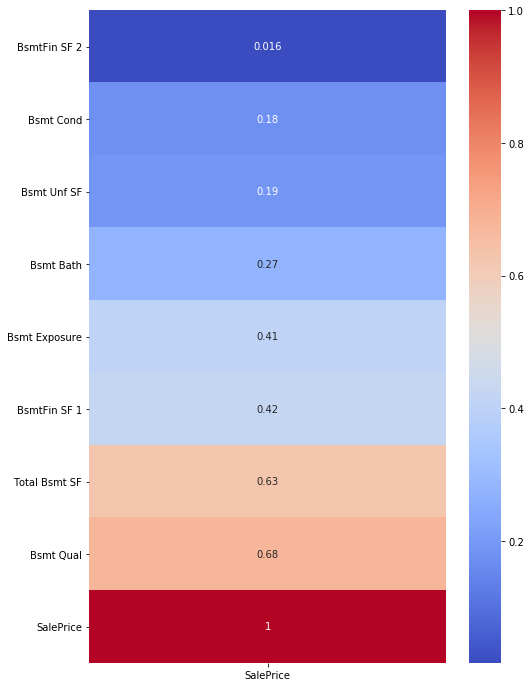

In [56]:
plt.figure(figsize = (8,12))
sns.heatmap(basement.corr()[['SalePrice']].sort_values(by='SalePrice'),cmap='coolwarm',annot=True)

Conclusion, keep the Total Bsmt SF and Bsmt Qual columns, drop the rest

In [57]:
train.shape

(2050, 70)

In [58]:
train.drop(['BsmtFin SF 1','Bsmt Unf SF','BsmtFin SF 2','Bsmt Full Bath','Bsmt Half Bath',\
    'Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure'],axis=1,inplace=True)

In [59]:
train.shape

(2050, 61)

In [60]:
#apply my basement quality transform
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex':10,'Gd':9,'TA':8,'Fa':7,'Po':6,'NA':0})

In [61]:
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
                  ... 
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Abv

Address Lot Frontage
Lot Frontage (Continuous): Linear feet of street connected to property

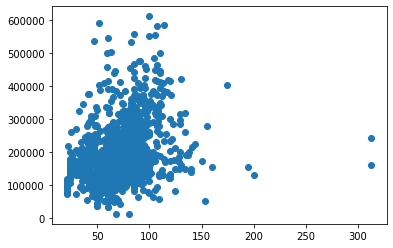

In [62]:
plt.scatter(train['Lot Frontage'],train['SalePrice'])

In [63]:
train['Lot Frontage'].corr(train['SalePrice'])

0.34175250218010955

That's not a great correlation score, will drop column

Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
Mas Vnr Area (Continuous): Masonry veneer area in square feet


In [64]:
train['Mas Type Mod'] = train['Mas Vnr Type'].map({'BrkCmn':5,'BrkFace':4,'CBlock':3,'Stone':2,'None':1})

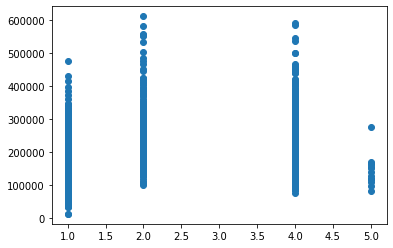

In [65]:
plt.scatter(train['Mas Type Mod'],train['SalePrice'])

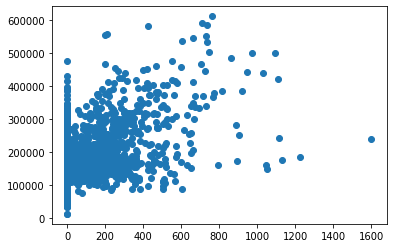

In [66]:
plt.scatter(train['Mas Vnr Area'],train['SalePrice'])

Definitely removing the Mas Vnr Area column, also removing the Mas Vnr Type column, that column appears to have some value but I'm not really sure how to address the nulls for it and we currenlty have an issue of having too many features as opposed to too few

In [67]:
train.drop(['Lot Frontage','Mas Vnr Area','Mas Type Mod','Mas Vnr Type'],axis=1,inplace=True)

In [68]:
train.shape

(2050, 58)

In [69]:
train.isnull().sum().sort_values()

Id                  0
Central Air         0
Electrical          0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Area         0
Paved Drive         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
Heating QC          0
Heating             0
SalePrice           0
Condition 2         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Sale Type           0
MS SubClass         0
Bldg Type           0
Overall Qual        0
Overall Cond        0
Year Built

At this point, I'm dropping all the nulls since the remainder are in columns we care about and want in our model

In [70]:
train.dropna(subset=['Total Bsmt SF'],inplace=True)

In [71]:
train['Bsmt Qual'].sum()/(2049-55)

8.590270812437312

In [72]:
#train.dropna(inplace=True)
#actually convert my basement quality nulls to value of 0, just for testing at the moment
train['Bsmt Qual'] = train['Bsmt Qual'].fillna(8.59)

In [73]:
train[train['Bsmt Qual'].isnull()]['Bsmt Qual']

Series([], Name: Bsmt Qual, dtype: float64)

In [74]:
train.shape

(2049, 58)

Let's combine the bathrooms and remove the ID columns

In [75]:
train['bath'] = train['Full Bath']+(.5*train['Half Bath'])

In [76]:
train.shape

(2049, 59)

In [77]:
train.drop(['Full Bath','Half Bath','Id','PID'],axis=1,inplace=True)

In [78]:
train.shape

(2049, 55)

*** This is my stopping point for EDA for now, really want to see what happens if I just run LASSO on this***

In [79]:
train.drop(['Utilities','Neighborhood','Condition 2','Roof Matl','Exterior 1st','Exterior 2nd','Heating',\
           'Electrical','Functional'],axis=1,inplace=True)

train.drop(['MS SubClass','MS Zoning','Foundation','Kitchen Qual','Sale Type'],axis=1,inplace=True)




# SalePrice
# Utilities_NoSeWa
# Neighborhood_GrnHill
# Neighborhood_Landmrk
# Condition 2_Feedr
# Condition 2_RRAe
# Condition 2_RRAn
# Condition 2_RRNn
# Roof Matl_CompShg
# Roof Matl_Membran
# Exterior 1st_CBlock
# Exterior 1st_ImStucc
# Exterior 1st_Stone
# Exterior 2nd_Stone
# Heating_OthW
# Heating QC_Po
# Electrical_Mix
# Functional_Sal
# Functional_Sev

In [80]:
train.drop(['Heating QC'],axis=1,inplace=True)

In [81]:
train2 = pd.get_dummies(train,drop_first = True)

In [82]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [83]:
train2.shape

(2049, 74)

In [84]:
y = train2['SalePrice']
X = train2[[name for name in train2.columns if name != 'SalePrice']]

In [85]:
X.shape

(2049, 73)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler


In [88]:
ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/yichenh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
lasso = LassoCV(n_alphas=200,cv=10,verbose=1)
lasso.fit(X_scaled_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=1)

In [90]:
lasso.alpha_

470.32753771361615

In [91]:
final_lasso = Lasso(alpha=lasso.alpha_)

final_lasso = Lasso(alpha=lasso.alpha_)
final_lasso.fit(X_scaled_train,y_train)

Lasso(alpha=470.32753771361615, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
final_lasso.score(X_scaled_train,y_train)

0.8535582977624707

In [93]:
final_lasso.score(X_scaled_test,y_test)

0.8740012687401912

In [94]:
pred = final_lasso.predict(X_scaled_test)

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
np.sqrt(mean_squared_error(y_test,pred))

28308.10461723949

In [97]:
test = pd.read_csv('test.csv')

In [98]:
test.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],inplace = True)

In [99]:
test.drop(columns=['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond'],inplace = True)

In [100]:
test.drop(['BsmtFin SF 1','Bsmt Unf SF','BsmtFin SF 2','Bsmt Full Bath','Bsmt Half Bath',\
    'Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure'],axis=1,inplace=True)


In [101]:
#apply my basement quality transform
test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex':10,'Gd':9,'TA':8,'Fa':7,'Po':6,'NA':0})


In [102]:
test.drop(['Lot Frontage','Mas Vnr Area','Mas Vnr Type'],axis=1,inplace=True)

In [103]:
test['bath'] = test['Full Bath']+(.5*test['Half Bath'])

In [104]:
test.drop(['Full Bath','Half Bath','PID'],axis=1,inplace=True)

In [105]:
test.drop(['Utilities','Neighborhood','Condition 2','Roof Matl','Exterior 1st','Exterior 2nd','Heating',\
           'Electrical','Functional'],axis=1,inplace=True)

In [106]:
test.drop(['Heating QC'],axis=1,inplace=True)

In [107]:
test.drop(['MS SubClass','MS Zoning','Foundation','Kitchen Qual','Sale Type'],axis=1,inplace=True)

In [108]:
test.shape

(879, 40)

In [109]:
test2 = pd.get_dummies(test,drop_first = True)

In [110]:
test2.shape

(879, 74)

In [111]:
test2.isnull().sum().sort_values()

Id                     0
House Style_1.5Unf     0
Bldg Type_TwnhsE       0
Bldg Type_Twnhs        0
Bldg Type_Duplex       0
Bldg Type_2fmCon       0
Condition 1_RRNn       0
House Style_1Story     0
Condition 1_RRNe       0
Condition 1_RRAe       0
Condition 1_PosN       0
Condition 1_PosA       0
Condition 1_Norm       0
Condition 1_Feedr      0
Land Slope_Sev         0
Condition 1_RRAn       0
House Style_2.5Fin     0
House Style_2.5Unf     0
House Style_2Story     0
Central Air_Y          0
Exter Cond_TA          0
Exter Cond_Po          0
Exter Cond_Gd          0
Exter Cond_Fa          0
Exter Qual_TA          0
Exter Qual_Gd          0
Exter Qual_Fa          0
Roof Style_Shed        0
Roof Style_Mansard     0
Roof Style_Hip         0
                      ..
Garage Area            0
2nd Flr SF             0
Total Bsmt SF          0
Year Remod/Add         0
Year Built             0
Overall Cond           0
Overall Qual           0
Lot Area               0
1st Flr SF             0


In [112]:
test2['Bsmt Qual'] = test2['Bsmt Qual'].fillna(8.59)

In [113]:
test2.isnull().sum().sum()

0

In [114]:
for name in test2.columns:
    if name not in train2.columns:
        print(name)

Id


In [115]:
test2noid = test2[[name for name in test2.columns if name != 'Id']]
#X = train2[[name for name in train2.columns if name != 'SalePrice']]

In [116]:
test2noid_scaled = ss.transform(test2noid)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [117]:
pred = final_lasso.predict(test2noid_scaled)

In [119]:
lasso_coefs = pd.DataFrame({
    'feature_name':X.columns,
    'coefficients':final_lasso.coef_,
    'abs_coef':np.abs(final_lasso.coef_)
})

lasso_coefs.sort_values('abs_coef',ascending=False, inplace=True)
lasso_coefs.head(50)

,feature_name,coefficients,abs_coef
10,Gr Liv Area,23796.150213,23796.150213
65,Exter Qual_TA,-23442.206045,23442.206045
1,Overall Qual,18894.494739,18894.494739
64,Exter Qual_Gd,-16677.666917,16677.666917
5,Bsmt Qual,8856.901765,8856.901765
3,Year Built,7032.491713,7032.491713
22,Misc Val,-6997.512855,6997.512855
15,Garage Area,6459.643293,6459.643293
30,Land Contour_HLS,5695.678159,5695.678159
6,Total Bsmt SF,5220.124787,5220.124787


In [133]:
#time to submit
submit = pd.DataFrame({
    'Id':test2['Id'],
    'SalePrice':pred
})

In [134]:
submit.head()

,Id,SalePrice
0,2658,136522.960006
1,2718,185922.852172
2,2414,211507.999245
3,1989,128387.546103
4,625,196950.222282


In [135]:
submit.shape

(879, 2)

In [136]:
submit.to_csv('submit_correct_best.csv',index=False)

In [ ]:
#run a correlation and pull highest
#do something regarding categorical variables
#combine columns too